<a href="https://colab.research.google.com/github/aakhterov/ML_algorithms_from_scratch/blob/master/SVM_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""

Implematation of SVM algorithm with linear kernel function

"""

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Note for gradient descend
<p> Linear kernel: $ \hat{y_i} = w^Tx_i + b $ </p>
<p> Loss function - Hinge Loss: $ L(y_i, \hat{y_i})=\max(0,1-y_i\hat{y_i}) $ </p>
<p> Cost function: $ J(y, \hat{y})=\sum_{i=1}^{n} L(y_i, \hat{y_i}) + \gamma\|w\|^2  $ </p>
<p>
$$
W = W - \alpha \frac{dJ}{dW}
$$
</p>
<p>
$$
b = b - \alpha \frac{dJ}{db}
$$
</p>
<p> If there is misclassification: $ dW=2\gamma w - y_ix_i $ </p>
<p> If there is no misclassification: $ dW=2\gamma w $ </p>

<p><b> In matrix form: </b></p>
<div> X - input matrix (train set). Shape $ (n, m) $, $n$ - numnber of samples, $m$ - number of features </div>
<div> y - ground truth. Shape $ (n,) $. $ y_i \in {-1,1} $ </div>
<div> W - weights. Shape $ (m, 1) $ </div>
<div> b - bias. Shape $ (1, 1) $ </div>
<div> $\hat{y}=XW + b$ - prediction. Shape $ (n, 1) $ </div>
<p>Example</p>
<div>$ X = [[1,2], [3,4], [5,6], [7,8]] $</div>
<div>$ y=[1, 1, -1, -1] $</div>
<div>$ W \in R^{2x1}, W=[[w_1], [w_2]] $</div>
<div>$ \hat{y}=[[1.5], [0.1], [-0.5], [-2]] $</div>
<div>$ n=4, m=2 $</div>
<div>Point 1 - right classification</div>
<div>Point 2 - wrong classification</div>
<div>Point 3 - right classification, but within margin ($ y_3\hat{y_3} < 1 $)</div>
<div>Point 4 - right classification</div>
<div>$ dW \in R^{2x1}, W=[[dw_1], [dw_2]] $</div>
<p>
$$
dw_1 = (2\gamma w_1) + (2\gamma w_1 - 1\cdot3) + (2\gamma w_1 - (-1)\cdot5) + (2\gamma w_1) = n * 2\gamma w_1 - (1\cdot3) - (-1)\cdot5
$$
$$
dw_2 = (2\gamma w_2) + (2\gamma w_2 - 1\cdot4) + (2\gamma w_2 - (-1)\cdot6) + (2\gamma w_2) = n * 2\gamma w_2 - (1\cdot4) - (-1)\cdot6
$$
</p>
<p>
If rewrite it in numpy:
$$
cond\_misclass = (y\cdot\hat{y} < 1).ravel() - ([False, True, True, False]) - misclassification points
$$
$$
C = 2 \gamma W
$$
$$
dW = -np.dot(X[cond_misclass]^T, y[cond_misclass]) + C \cdot n
$$
</p>

In [ ]:
class LinearSVM:

    def __init__(self):
        self.W = None
        self.b = None

    def __initialization(self, m_feature):
        self.W = np.random.randn(m_feature, 1)
        self.b = np.random.randn(1, 1)

    def __evalute_kernel_function(self, X):
        return np.dot(X, self.W) + self.b

    def __evalute_hinge_loss(self, z):
        return np.maximum(0, 1-z)

    def __evalute_cost_function(self, y, y_hat, gamma):
        return np.sum(self.__evalute_hinge_loss(y*y_hat)) + gamma*np.linalg.norm(self.W)

    def fit(self, X, y, iterations=1000, learning_rate=0.001, gamma=None, show_cost_every_iter=100):
        y = y.reshape(-1,1)
        m_feature = X.shape[1]
        n = X.shape[0]
        self.__initialization(m_feature)

        for i in range(1, iterations+1):
            gamma_ = 1/i if gamma is None else gamma
            y_hat = self.__evalute_kernel_function(X)
            cost = self.__evalute_cost_function(y, y_hat, gamma_)
            cond_misclass = (y*y_hat < 1).ravel()

            C = 2*gamma_ * self.W
            dW = -np.dot(X[cond_misclass].T, y[cond_misclass]) + C*n
            db = -np.sum(y[cond_misclass])
            self.W = self.W - learning_rate*dW
            self.b = self.b - learning_rate*db

            if i%show_cost_every_iter == 0:
                print(f"Iteration: {i}. Cost={cost}")

    def predict(self, X):
        y_hat = self.__evalute_kernel_function(X)
        return np.array(list(map(lambda x: 1 if x>=0 else -1, y_hat)))

### Testing on sintetic data

In [ ]:
N_per_class = 30
x1 = 7*np.random.rand(N_per_class,1)
x2 = 3 + 7*np.random.rand(N_per_class,1)
y_class1 = 3*np.random.rand(N_per_class,1)
y_class2 = 4 + 7*np.random.rand(N_per_class,1)
x = np.vstack((x1, x2))
y = np.vstack((y_class1, y_class2))
X = np.hstack((x,y))
y = np.hstack(([1 for _ in range(N_per_class)], [-1 for _ in range(N_per_class)]))
print(f"X.shape={X.shape}, y.shape={y.shape}")

X.shape=(60, 2), y.shape=(60,)


<AxesSubplot:>

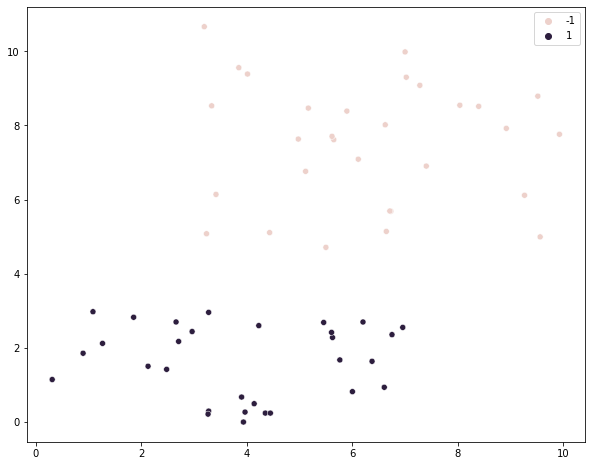

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
svm = LinearSVM()
svm.fit(X_train, y_train, iterations=3000, learning_rate=0.001)

Iteration: 100. Cost=7.596280762397499
Iteration: 200. Cost=4.2139346392151875
Iteration: 300. Cost=2.606236126414688
Iteration: 400. Cost=1.9733219364644352
Iteration: 500. Cost=1.6257902428041289
Iteration: 600. Cost=1.3424995985144312
Iteration: 700. Cost=1.1011116450611662
Iteration: 800. Cost=0.8501592670124523
Iteration: 900. Cost=0.6807294872051108
Iteration: 1000. Cost=0.5916885547822217
Iteration: 1100. Cost=0.4241533727047499
Iteration: 1200. Cost=0.34437872068686337
Iteration: 1300. Cost=0.2909635858355725
Iteration: 1400. Cost=0.2534759442792253
Iteration: 1500. Cost=0.20669176559028715
Iteration: 1600. Cost=0.17123937625363939
Iteration: 1700. Cost=0.1377167738316224
Iteration: 1800. Cost=0.100402105386091
Iteration: 1900. Cost=0.06329025977998218
Iteration: 2000. Cost=0.022590123242875824
Iteration: 2100. Cost=0.01738439697687855
Iteration: 2200. Cost=0.00046289577302295425
Iteration: 2300. Cost=0.0004432487606976013
Iteration: 2400. Cost=0.0004357562644190353
Iteration: 

In [ ]:
y_hat = svm.predict(X_test)
print("Accuracy=", accuracy_score(y_test, y_hat))

Accuracy= 1.0


In [ ]:
def boarder_line(X, W, b):
    return -(W[0][0]*X + b[0][0])/W[1][0]
def boarder_line_plus_one(X, W, b):
    return -(W[0][0]*X + (b[0][0]+1))/W[1][0]
def boarder_line_minus_one(X, W, b):
    return -(W[0][0]*X + (b[0][0]-1))/W[1][0]

<AxesSubplot:>

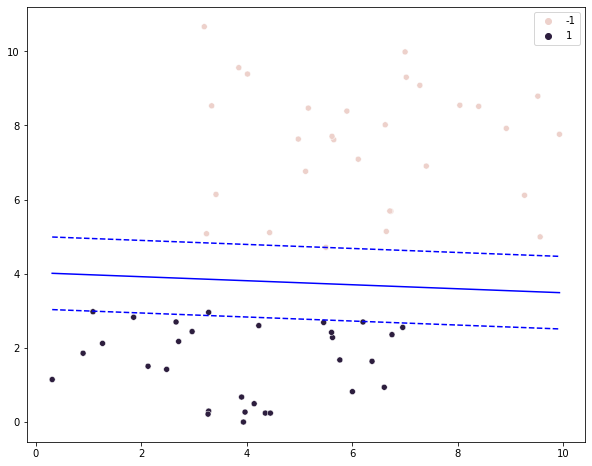

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)
sns.lineplot(x=X[:,0], y=boarder_line(X[:,0], svm.W, svm.b), c='blue')
sns.lineplot(x=X[:,0], y=boarder_line_plus_one(X[:,0], svm.W, svm.b), c='blue', linestyle='--')
sns.lineplot(x=X[:,0], y=boarder_line_minus_one(X[:,0], svm.W, svm.b), c='blue', linestyle='--')

### Testing on real data (Breast cancer wisconsin (diagnostic) dataset)  

In [ ]:
# Load data

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
breast_cancer = load_breast_cancer(as_frame=True)
data_df = breast_cancer.data
target_df = breast_cancer.target
y = np.array(list(map(lambda x: 1 if x else -1, target_df.tolist())))

In [ ]:
# Data preprocessing: scaling

In [ ]:
# data from this row looks like a normal distribution
col_for_standard_scaler = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'texture error', 'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concave points',
       'worst symmetry', 'worst fractal dimension']
# data from this row doesn't look like a normal distribution
col_for_maxmin_scaler = ['mean concavity', 'radius error', 'perimeter error', 'area error', 'worst concavity']

In [ ]:
std_scaler = StandardScaler()
X = std_scaler.fit_transform(data_df.loc[:,col_for_standard_scaler])
mm_scaler = MinMaxScaler()
X = np.hstack((X, mm_scaler.fit_transform(data_df.loc[:,col_for_maxmin_scaler])))

In [ ]:
# Splitting data for training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# Checking for imbalance in sets

In [ ]:
unique_train = np.unique(y_train, return_counts=True)
unique_test = np.unique(y_test, return_counts=True)
print("Number of samples per class in train set", unique_train)
print("Number of samples per class in test set", unique_test)

Number of samples per class in train set (array([-1,  1]), array([169, 286]))
Number of samples per class in test set (array([-1,  1]), array([43, 71]))


In [ ]:
# Train and Test sets are imbalance

In [ ]:
# Calculate the difference between classes in test sets
delta_in_test = unique_test[1][1] - unique_test[1][0]

In [ ]:
# Choose randomly from zero class delta_in_train samples and add them to train test
a = np.c_[X_test, y_test]
only_zero_class = a[(a[:,-1:]==-1).flatten()]
number_samples = only_zero_class.shape[0]
idx = np.random.choice(np.array(range(number_samples)), delta_in_test , replace=False)
only_zero_class_extended = np.vstack((only_zero_class[idx], only_zero_class))
print("Shape of extended zero class", only_zero_class_extended.shape)

Shape of extended zero class (71, 31)


In [ ]:
only_one_class = a[(a[:,-1:]==1).flatten()]
all_classes = np.vstack((only_zero_class_extended, only_one_class))
X_test, y_test = all_classes[:,:-1], all_classes[:,-1:]
print("Number of samples per class in test set", np.unique(y_test, return_counts=True))

Number of samples per class in test set (array([-1.,  1.]), array([71, 71]))


In [ ]:
# Test set now is balanced

In [ ]:
svm = LinearSVM()
svm.fit(X_train, y_train, iterations=50000, learning_rate=0.001, show_cost_every_iter=10000)

Iteration: 10000. Cost=14.334814798549733
Iteration: 20000. Cost=11.639776024483588
Iteration: 30000. Cost=11.127046959067787
Iteration: 40000. Cost=10.378861749901345
Iteration: 50000. Cost=9.6900718667606


In [ ]:
y_hat_test = svm.predict(X_test)
print("Accuracy of current implementation =", accuracy_score(y_test, y_hat_test))

Accuracy of current implementation = 0.9436619718309859


In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC(gamma='auto', kernel='linear')
svc.fit(X_train, y_train)
y_hat_svc = svc.predict(X_test)
print("Accuracy of sklearn implementation =", accuracy_score(y_test, y_hat_svc))

Accuracy of sklearn implementation = 0.9657534246575342
